In [8]:
def vectorfield(w, t, p):

    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p

    # Creamos f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) - k2 * ( x1 - L1 + L2 - x2 )) / m1,
         y2,
         (-b2 * y2 - k3 * ( x2 - L2 ) - k2 * ( x2 - L2 + L1 - x1 ))/ m2]
    
    return f

In [12]:
from scipy.integrate import odeint

# Valores de los parámetros
# Masas:
m1 = 1.0
m2 = 1.0

# Constantes de los resortes
k1 = 1.0
k2 = 1.0
k3 = 1.0

# Longitudes naturales
L1 = 1.0
L2 = 1.0

#Coeficientes de fricción
b1 = 1.0
b2 = 0.0

# Condiciones iniciales
# x1 y x2 son los desplazamientos iniciales
# y1 y y2 son las velocidades iniciales
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

#Pámetros de reslución del EDO 
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750


# Creamos las muestras de tiempo para el resultado del solucionador de EDO  
# Usamos un gran número de puntos, para hacer una gráfica de la solución con 
# buen aspecto.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


# Empacamos los parámetros y las condiciones iniciales:
p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Llamamos al solucionador de EDO.
wsol = odeint(vectorfield, w0, t, args=(p,),atol=abserr, rtol=relerr)


for t1, w1 in zip(t, wsol):
    print(t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a"))

Text(0.5, 1.0, 'Desplazamiento de Masas para un\nSistema Masa-Resorte Acoplado')

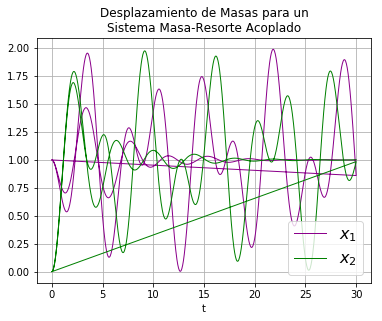

In [13]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, color='#8B008B', linewidth=lw)
plot(t, x2, color= "g", linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Desplazamiento de Masas para un\nSistema Masa-Resorte Acoplado')
#savefig('dos_resortes.png', dpi=100)